## Forecasting exercise on WSB data for a shampoo brand Kesh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv('wsb.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [5]:
df.shape

(48, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [7]:
df.describe()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
count,48.00,4.800000e+01,48.000000,48.000000
mean,24.50,3.825340e+06,137.229167,0.395833
std,14.00,6.233543e+05,20.911403,0.494204
min,1.00,2.798343e+06,98.000000,0.000000
25%,12.75,3.338460e+06,120.750000,0.000000
50%,24.50,3.724724e+06,135.500000,0.000000
75%,36.25,4.322192e+06,157.000000,1.000000
max,48.00,5.431651e+06,170.000000,1.000000


### To visualize the sale quantity over Month using plot() method from Matplotlib

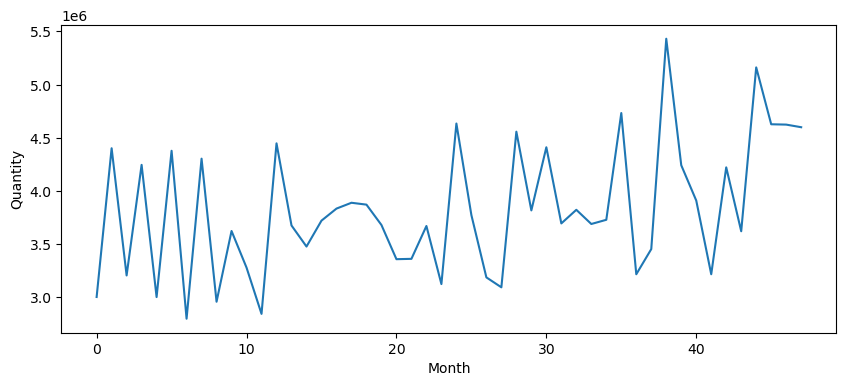

In [8]:
plt.figure(figsize=(10,4))
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.plot(df['Sale Quantity']);



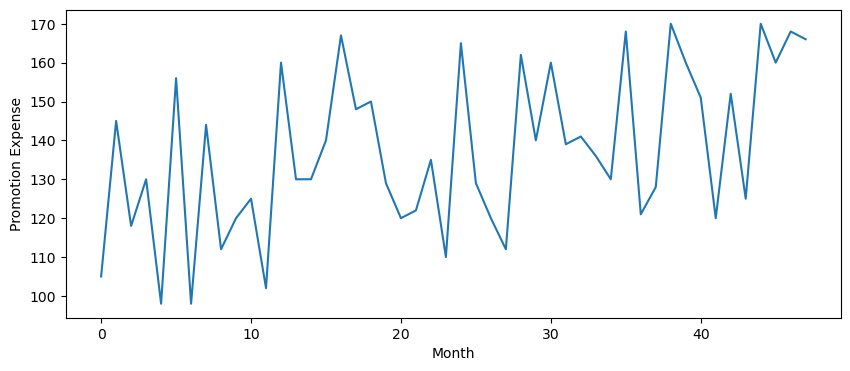

In [9]:
plt.figure(figsize=(10,4))
plt.xlabel("Month")
plt.ylabel("Promotion Expense")
plt.plot(df['Promotion Expenses']);


### Forecasting using Moving Average 

#### An article link : https://medium.com/@anuj_chavan/forecasting-the-future-a-comprehensive-guide-to-moving-averages-in-time-series-analysis-880fa17e877a

#### We are calculating a 12 month moving average

In [10]:
df['mavg_12'] = df['Sale Quantity'].rolling(window = 12).mean().shift(1)

In [11]:
# To display values upto 2 decimal places 

pd.set_option('display.float_format', lambda x : '%.2f' %x)
df[['Sale Quantity','mavg_12']]

,Sale Quantity,mavg_12
0,3002666,NaN
1,4401553,NaN
2,3205279,NaN
3,4245349,NaN
4,3001940,NaN
5,4377766,NaN
6,2798343,NaN
7,4303668,NaN
8,2958185,NaN
9,3623386,NaN


#### Plotting the actual vs the predicted values from moving average forecasting

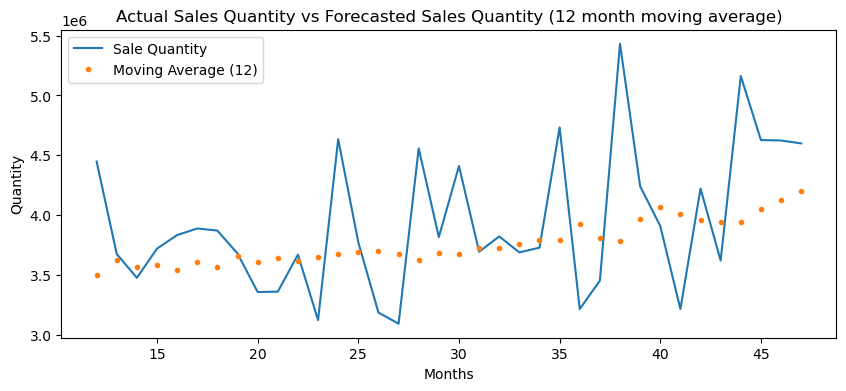

In [12]:
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(df['Sale Quantity'][12:], label='Sale Quantity');
plt.plot(df['mavg_12'][12:], '.', label='Moving Average (12)');
plt.title("Actual Sales Quantity vs Forecasted Sales Quantity (12 month moving average)")
plt.legend()
plt.show()

### Calculating the Forecast Accuracy

#### Root mean square error (RMSE) and Mean absolute percentage error (MAPE) are two of the most popular accuracy measures for forecasting

#### Mean Absolute Percentage Error (MAPE)

In [13]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)

In [14]:
received_mape = get_mape (df['Sale Quantity'][12:].values, df['mavg_12'][12:].values)

In [15]:
print ("The Mean Absolute Percentage Error (MAPE) is : ", received_mape, "%")

The Mean Absolute Percentage Error (MAPE) is :  10.54 %


#### Root Mean Square Error (RMSE)

In [16]:
from sklearn.metrics import mean_squared_error

y_true = df['Sale Quantity'][12:].values
y_pred = df['mavg_12'][12:].values

mse = mean_squared_error(y_true,y_pred)

rmse = np.round(np.sqrt(mse),2)

print ("The Root Mean Square Error is : ",rmse)

The Root Mean Square Error is :  575614.45


In [17]:
# Calculating the MAPE using the skearn.metrics library


from sklearn.metrics import mean_absolute_percentage_error
y_true = df['Sale Quantity'][12:].values
y_pred = df['mavg_12'][12:].values

mape = np.round((mean_absolute_percentage_error(y_true, y_pred)*100),2)

print ('The Mean Absolute Error is :',mape,"%")


The Mean Absolute Error is : 10.54 %


### Exponential Smoothing

In [18]:
df['esm'] = df['Sale Quantity'].ewm(alpha= 0.2).mean()

In [19]:
# Setting the floating point formatting upto decimal places

pd.options.display.float_format = '{:.2f}'.format

In [20]:
df

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,esm
0,1,3002666,105,1,NaN,3002666.00
1,2,4401553,145,0,NaN,3779825.44
2,3,3205279,118,1,NaN,3544355.59
3,4,4245349,130,0,NaN,3781819.48
4,5,3001940,98,1,NaN,3549822.97
5,6,4377766,156,0,NaN,3774241.56
6,7,2798343,98,1,NaN,3527267.67
7,8,4303668,144,0,NaN,3713851.27
8,9,2958185,112,1,NaN,3539288.61
9,10,3623386,120,0,NaN,3558131.31


#### Plotting the forecasted vs actual sales quantity using the exponential smoothing method

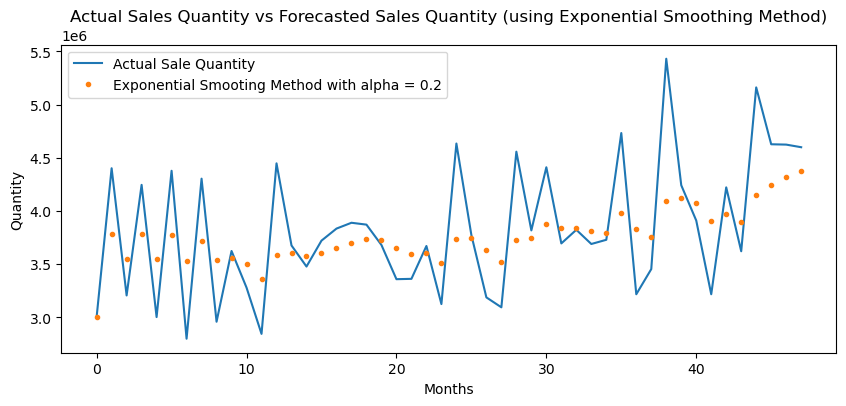

In [21]:
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(df['Sale Quantity'] ,label="Actual Sale Quantity" )
plt.plot(df['esm'], ".", label = "Exponential Smooting Method with alpha = 0.2")
plt.title ("Actual Sales Quantity vs Forecasted Sales Quantity (using Exponential Smoothing Method)")
plt.legend()
plt.show()

#### Calculating the MAPE for Exponential Smoothing Method

In [22]:
y_true = df['Sale Quantity'][:].values
y_pred = df['esm'][:].values

mape = np.round((mean_absolute_percentage_error(y_true,y_pred)*100),2)


print ("The Mean Absolute Percentage Error is : ",mape,"%")

The Mean Absolute Percentage Error is :  9.66 %


#### Calculating the Root Mean Square Error (RMSE)

In [23]:
y_true = df['Sale Quantity'][:].values
y_pred = df['esm'][:].values


mse = mean_squared_error(y_true,y_pred)

rmse = np.round((np.sqrt(mse)),2)

print ("The Root Mean Square Error is ", rmse)

The Root Mean Square Error is  479928.7


### Decomposing time series

#### A time-series data can be modelled as an addition or product of trend, seasonality, cyclical and irregular components.

In [25]:
# Decomposition of the time series data

from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose = seasonal_decompose(np.array(df['Sale Quantity']), model='multiplicative', period=12)

#### Plotting te decomposed time-series components

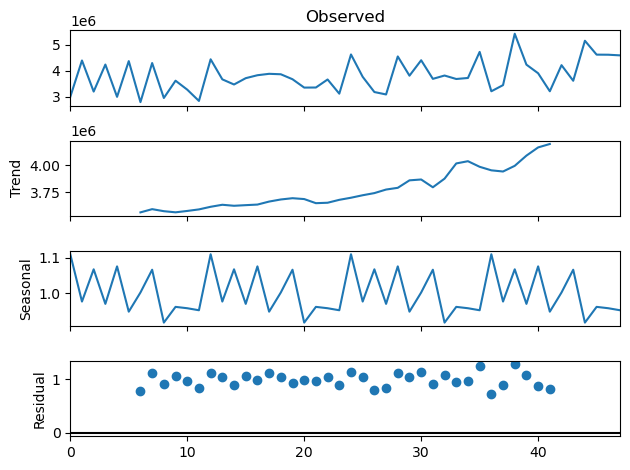

In [26]:
ts_plot = ts_decompose.plot()

#### To capture the seasonal & trend components after time-series decomposition

In [33]:
df['seasonal'] = ts_decompose.seasonal
df['trend'] = ts_decompose.trend
df['residual'] = ts_decompose.resid

In [34]:
df.shape

(48, 9)

In [35]:
df

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,esm,seasonal,trend,residual
0,1,3002666,105,1,NaN,3002666.00,1.11,NaN,NaN
1,2,4401553,145,0,NaN,3779825.44,0.98,NaN,NaN
2,3,3205279,118,1,NaN,3544355.59,1.07,NaN,NaN
3,4,4245349,130,0,NaN,3781819.48,0.97,NaN,NaN
4,5,3001940,98,1,NaN,3549822.97,1.08,NaN,NaN
5,6,4377766,156,0,NaN,3774241.56,0.95,NaN,NaN
6,7,2798343,98,1,NaN,3527267.67,1.00,3563622.79,0.78
7,8,4303668,144,0,NaN,3713851.27,1.07,3593567.25,1.12
8,9,2958185,112,1,NaN,3539288.61,0.92,3574635.12,0.90
9,10,3623386,120,0,NaN,3558131.31,0.96,3564106.88,1.06
